Extract banking decisions versus unrolling factor to a csv file

In [5]:
from banking import MyHTMLParser
import codecs

for g in range(1,17):
    name = "banks/decisions_"+str(g)+".html"
    f=codecs.open(name, 'r')
    content = f.read()
    # instantiate the parser and fed it some HTML
    parser = MyHTMLParser(g)
    parser.feed(content)

Plot the banking decision versus unrolling factor

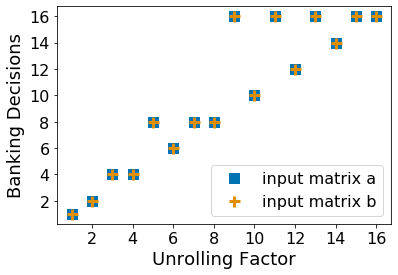

In [6]:
import re
import csv
import json


import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

cl = sns.color_palette("colorblind",6)
PERF_RESOURCES = ['dsp_used', 'bram_tile_used','lut_used'] 
PERF_AVAIL = ['dsp_avail', 'bram_tile_avail', 'lut_avail']

fig,ax1 = plt.subplots()
loop_k = np.arange(16)+1
marker = {'input_matrix_a':'s','input_matrix_b':'+'}
leg1 = ['input matrix a','input matrix b']
#ax2 = ax1.twinx()
ms = [8,11]
for i, sram in enumerate(marker):
    df = pd.read_csv('banks/'+sram+'.csv')
    bank = [ eval(re.sub("\s+", ",", n.strip()))[0] for n in df[' N']]
    ax1.plot(loop_k,bank, marker[sram], color=cl[i], ms = ms[i], mew=3)
ax1.legend(leg1,loc=4, prop={'size':16})
ax1.set_ylabel('Banking Decisions', fontsize = 18)
ax1.set_xlabel('Unrolling Factor',fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#PERF_RESOURCES_NAME = ['DSP used', 'BRAM used','LUT used'] 
#ax1.legend(PERF_RESOURCES_NAME,prop={'size': 16})
plt.show()

Generate normalized resource usage after synthesis

In [8]:
from benchmarking.parsing.rpt import RPTParser
from benchmarking.summary import extracting as ex
from rpt_parse import RPTParser
with open('rpts/summary.csv', 'w') as csvfile:
    # Get fieldnames from the first file
    fieldnames = list(ex.sds_report("rpts/par_utilization_1.rpt").keys()) + ['unroll']
    summary = csv.DictWriter(csvfile, delimiter=',', fieldnames=fieldnames)
    summary.writeheader()

    # Get remaining rows
    for i in range(1,17):
        row = ex.sds_report("rpts/par_utilization_{}.rpt".format(i))
        row['unroll'] = i
        summary.writerow(row)   

Plot the banking decision versus unrolling factor